# Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных

**Выполнил:** Шарыкин Александр Викторович  
В качестве источника данных использовался сборник Росстата "Регионы России. Социально-экономические показатели" (https://rosstat.gov.ru/folder/210/document/47652)

In [18]:
import pandas as pd
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1

**1.a)** В качестве примера нормально распределённого признака, а также признака с медианой, не смещённой относительно среднего, возьмём "удельный вес городского населения в общей численности населения (%)"

In [19]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df = pd.read_excel(xlsx, sheet_name="1.3.")
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num+1]
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df[~df[df.columns[0]].str.contains("федеральный округ")]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(["Регион", "Значение в 2022"], axis=1)
df = df.reset_index(drop=True).dropna()
df

,Регион,Значение в 2022
0,Белгородская область,65.4
1,Брянская область,69.6
2,Владимирская область,77.6
3,Воронежская область,68.5
4,Ивановская область,82.1
...,...,...
80,Амурская область,68.4
81,Магаданская область,96.5
82,Сахалинская область,82.6
83,Еврейская автономная область,70.8


In [20]:
col = df["Значение в 2022"]
min = col.min()
max = col.max()
range = max - min
print(f"Минимум: {min}")
print(f"Максимум: {max}")
print(f"Размах: {range}")

Минимум: 30.8
Максимум: 100.0
Размах: 69.2


In [21]:
mode = col.mode()[0]
mean = round(col.mean(), 2)
median = col.median()
print(f"Мода: {mode}")
print(f"Среднее: {mean}")
print(f"Медиана: {median}")

Мода: 67.7
Среднее: 70.9
Медиана: 71.4


Медиана почти не смещена относительно среднего. Также по гистограмме видно, что распределение признака напоминает нормальное

Отношение модуля разности между средним и медианой и размаха: 0.007


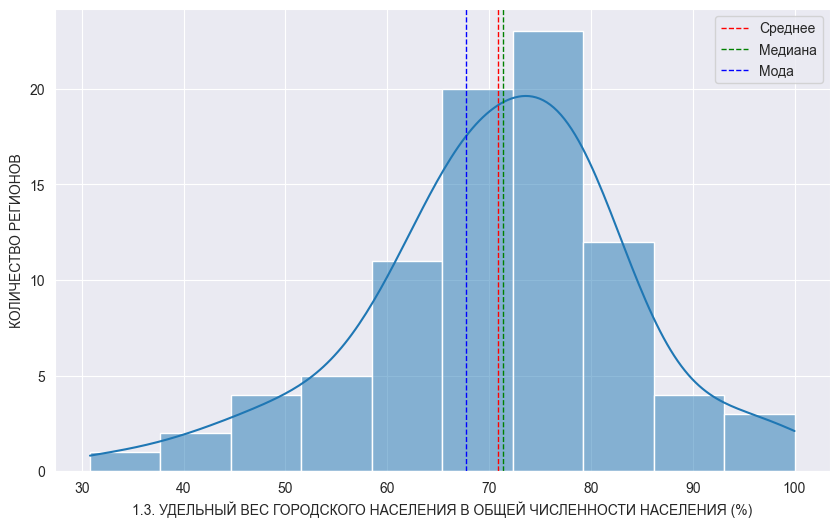

In [22]:
print(f"Отношение модуля разности между средним и медианой и размаха: {round(abs(mean - median) / range, 3)}")
plt.figure(figsize=(10, 6))
sns.histplot(col, bins=10, kde=True)
plt.ylabel("КОЛИЧЕСТВО РЕГИОНОВ")
plt.xlabel("1.3. УДЕЛЬНЫЙ ВЕС ГОРОДСКОГО НАСЕЛЕНИЯ В ОБЩЕЙ ЧИСЛЕННОСТИ НАСЕЛЕНИЯ (%)")
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Медиана')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=1, label='Мода')
plt.legend()
plt.show()

**1.б)** В качестве примера равномерно распредёленного признака возьмём "долю уловленных и обезвреженных загрязняющих атмосферу веществ в общем количестве отходящих от стационарных источников загрязняющих веществ (%)"

In [23]:
xlsx = ExcelFile("Razdel 7 - Zemelnye resursy.xlsx")
df = pd.read_excel(xlsx, sheet_name="7.4.")
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num+1]
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df[~df[df.columns[0]].str.contains("федеральный округ")]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(["Регион", "Значение в 2022"], axis=1)
df = df.reset_index(drop=True).dropna()
df

,Регион,Значение в 2022
0,Белгородская область,82.8
1,Брянская область,88.6
2,Владимирская область,15.5
3,Воронежская область,52.6
4,Ивановская область,20.7
...,...,...
80,Амурская область,69.6
81,Магаданская область,59.2
82,Сахалинская область,41.6
83,Еврейская автономная область,73.0


In [24]:
col = df["Значение в 2022"]
mode = col.mode()[0]
mean = round(col.mean(), 2)
median = col.median()
print(f"Мода: {mode}")
print(f"Среднее: {mean}")
print(f"Медиана: {median}")

Мода: 75.1
Среднее: 53.44
Медиана: 57.1


Я для многих различных наборов данных из сборника гистограммы построил, это было на вид самое близкое к равномерному распределению из всех :(

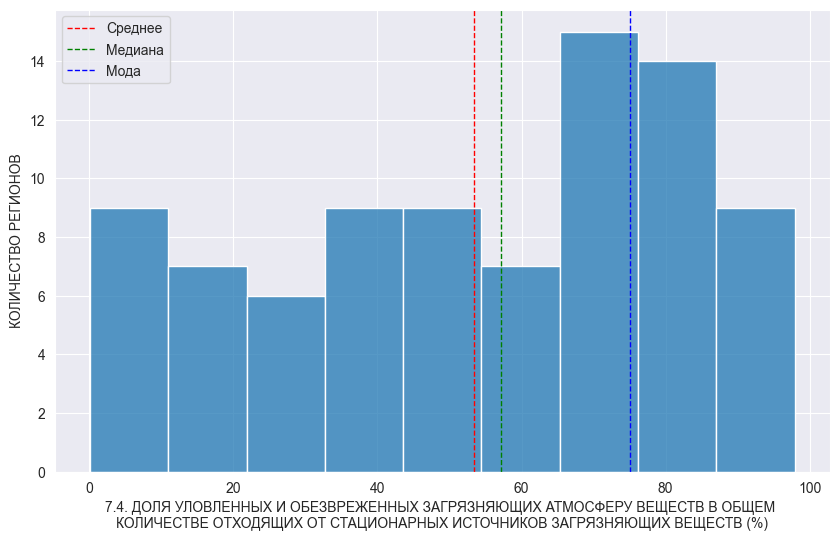

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(col, bins=9)
plt.ylabel("КОЛИЧЕСТВО РЕГИОНОВ")
plt.xlabel("7.4. ДОЛЯ УЛОВЛЕННЫХ И ОБЕЗВРЕЖЕННЫХ ЗАГРЯЗНЯЮЩИХ АТМОСФЕРУ ВЕЩЕСТВ В ОБЩЕМ \n" +
           "КОЛИЧЕСТВЕ ОТХОДЯЩИХ ОТ СТАЦИОНАРНЫХ ИСТОЧНИКОВ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ (%)")
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Медиана')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=1, label='Мода')
plt.legend()
plt.show()

**2)** В качестве примера признака с медианой, смещённой относительно среднего, возьмём "численность лиц, получивших убежище (человек)"

In [26]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df = pd.read_excel(xlsx, sheet_name="1.25.")
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num+1]
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df[~df[df.columns[0]].str.contains("федеральный округ")]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(["Регион", "Значение в 2022"], axis=1)
df = df.reset_index(drop=True).dropna()
df

,Регион,Значение в 2022
0,Белгородская область,2817.0
1,Брянская область,901.0
2,Владимирская область,649.0
3,Воронежская область,5539.0
4,Ивановская область,519.0
...,...,...
80,Амурская область,81.0
81,Магаданская область,66.0
82,Сахалинская область,23.0
83,Еврейская автономная область,5.0


In [27]:
col = df["Значение в 2022"]
min = col.min()
max = col.max()
range = max - min
print(f"Минимум: {min}")
print(f"Максимум: {max}")
print(f"Размах: {range}")

Минимум: 0.0
Максимум: 6296.0
Размах: 6296.0


In [28]:
mode = col.mode()[0]
mean = round(col.mean(), 2)
median = col.median()
print(f"Мода: {mode}")
print(f"Среднее: {mean}")
print(f"Медиана: {median}")

Мода: 0.0
Среднее: 803.52
Медиана: 151.5


К сожалению, довольно тяжело найти выборки, где разница между средним и медианой будет составлять 15% от размаха и больше. Возможно, это связано с тем, что среднее смещается относительно медианы из-за выбросов по краям, но выбросы одновременно увеличивают и размах. Максимальная разница, которую у меня получилось обнаружить - 10,4% от размаха.

Отношение модуля разности между средним и медианой и размаха: 0.104


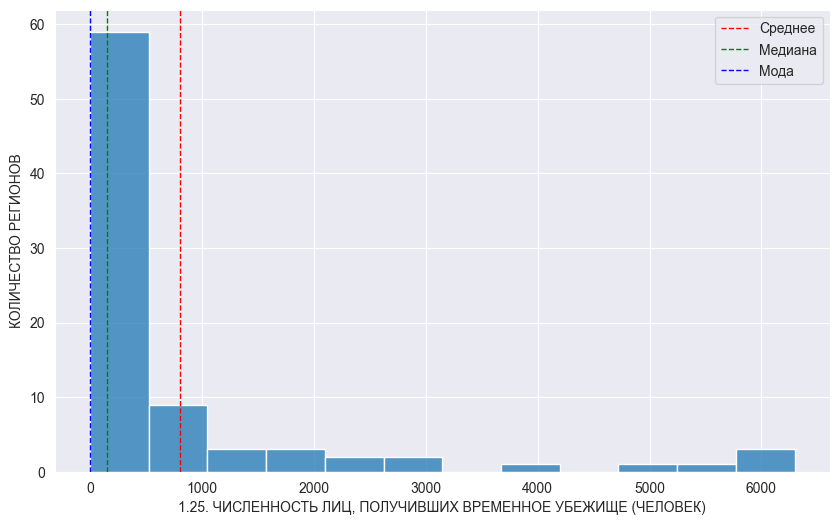

In [29]:
print(f"Отношение модуля разности между средним и медианой и размаха: {round(abs(mean - median) / range, 3)}")
plt.figure(figsize=(10, 6))
sns.histplot(col, bins=12)
plt.ylabel("КОЛИЧЕСТВО РЕГИОНОВ")
plt.xlabel("1.25. ЧИСЛЕННОСТЬ ЛИЦ, ПОЛУЧИВШИХ ВРЕМЕННОЕ УБЕЖИЩЕ (ЧЕЛОВЕК)")
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Медиана')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=1, label='Мода')
plt.legend()
plt.show()

## Часть 2
В качестве примера признака с аномальными значениями рассмотрим ту же выборку, что и в первом пункте ("удельный вес городского населения в общей численности населения (%)")

In [30]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df = pd.read_excel(xlsx, sheet_name="1.3.")
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num+1]
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df[~df[df.columns[0]].str.contains("федеральный округ")]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(["Регион", "Значение в 2022"], axis=1)
df = df.reset_index(drop=True).dropna()
col = df["Значение в 2022"]

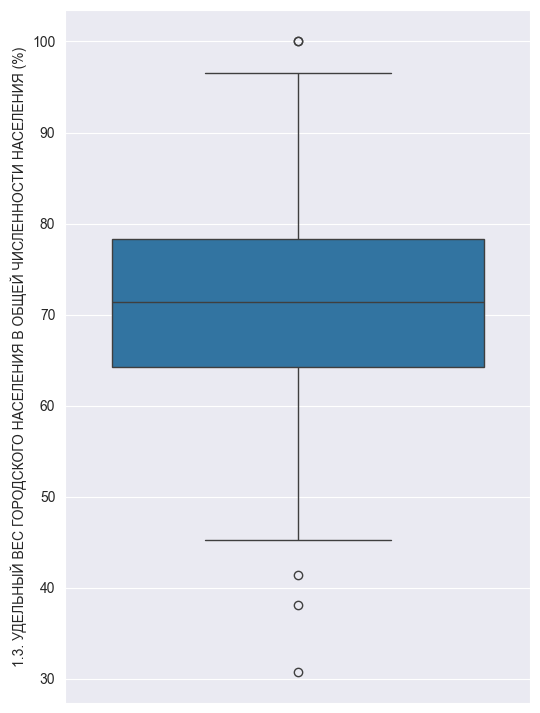

In [31]:
plt.figure(figsize=(6, 9))
sns.boxplot(col)
plt.ylabel("1.3. УДЕЛЬНЫЙ ВЕС ГОРОДСКОГО НАСЕЛЕНИЯ В ОБЩЕЙ ЧИСЛЕННОСТИ НАСЕЛЕНИЯ (%)")
plt.show()

In [32]:
q1 = col.quantile(0.25)
q3 = col.quantile(0.75)
iqr = q3 - q1
lower_bound = round(q1 - 1.5 * iqr, 2)
upper_bound = round(q3 + 1.5 * iqr, 2)
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

Нижняя граница: 43.05
Верхняя граница: 99.45


In [33]:
lower_outliers = df[col < lower_bound]
print("Нижние выбросы: ")
lower_outliers

Нижние выбросы: 


,Регион,Значение в 2022
40,Карачаево-Черкесская Республика,41.4
42,Чеченская Республика,38.1
64,Республика Алтай,30.8


Мы видим, что за нижнюю границу "ящика с усами" попали 3 аграрных региона, где большая часть населения занята сельским хозяйством, а также низкий уровень развития промышленности и инфраструктуры. Также в этих республиках сильны традиционные общины и семейные связи, что отражается на выборе места жительства

In [34]:
upper_outliers = df[col > upper_bound]
print("Верхние выбросы: ")
upper_outliers

Верхние выбросы: 


,Регион,Значение в 2022
17,г. Москва,100.0
28,г. Санкт-Петербург,100.0


За верхнюю границу "ящика с усами" ожидаемо попали 2 города федерального назначения, в которых нет сельского населения 

## Выводы
В ходе работы я проанализировал довольно много выборок и пришёл к следующим выводам:  
1. Распределения, похожие на нормальное, встречаются нередко, особенно для признаков, имеющих относительное, а не абсолютное выражение (доля населения, количество населения на 1000 человек, на душу населения и т. д.)
2. Распределения, похожие на равномерное, найти очень непросто
3. Тяжело искать распределения с большой разницей между средним и медианой относительно размаха. Во-первых, такое наблюдается больше у признаков в абсолютном выражении. Во-вторых, смещение среднего происходит из-за выбросов по краям, которые увеличивают и размах.